# Task A: Investigating Population and Gender Equality in Education


In the task, you are required to visualise the relationship between the population in different countries, the income in different countries and the gender ratio (women % men, 25 to 34 years) in schools of different countries, and gain insights from how these relations and trends change over time. The data files used in this task were originally downloaded from Gapminder. We have extracted the data from the original files and put into a simpler format. Please download the data from Moodle:

•Population.csv: This file contains yearly data regarding the estimated resident population, grouping by countries around the world, between 1800 and 2018.

•GenderEquality.csv: This data file contains yearly data about the ratio of female to male number of years in school, among 25- to 34-years-olds, including primary, secondary and tertiary education across different countries around the world, for the period between 1970 and 2015.

•Income.csv: This data file contains yearly data of income per person adjusted for differences in purchasing power (in international dollars) across different countries around the world, for the period between 1800 and 2018.

In [90]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from motionchart.motionchart import MotionChart

#Predefined Function to calculate the ticks and its name for various Axis's
#Based on the min and max values of the array given
def findAxisCordinatesAndNamesForTicks(Values = [],formatValue = 1,divisions = 20,overallMin = -1,overallMax=-1):
    if(overallMin == -1):
        overallMin = Values.agg('min')
    if(overallMax == -1):
        overallMax = Values.agg('max')
    #Finding the y axis label
    axis = []
    axisVariableNames = []
    i = int(overallMin)
    diff = (overallMax - overallMin)/divisions
    if(diff > (int(diff)+ 0.5)):
        diff = int(diff + 1)
    elif(diff > 1):
        diff = int(diff)
    diff = round(diff,2)
    while(i < overallMax + diff):
        i = round(i,2)
        axis.append(i)
        if(formatValue != 1):
            axisVariableNames.append(str(i/formatValue))
        else : 
            axisVariableNames.append(str(i))
        i += diff
    return [axis,axisVariableNames]

#Defining a generic Predefined Function to plot a linear Fit for the Data provided based on Year
def plotLinearFitBasedOnYear(dataFrame, dataColumnName, fromYear = 0, toYear = 0, color = 'r-',
                             lineRegress = [],linearFitLabel = "",basedOnLabel = "",yearColumnName = 'Year'):
    yearMin = dataFrame[yearColumnName].agg('min')
    yearMax = dataFrame[yearColumnName].agg('max')
    newYearData = dataFrame[yearColumnName]
    newLineRegress = lineRegress
    if((fromYear == 0 and toYear == 0) or (fromYear >= yearMin and fromYear < yearMax)):
        newDataFrame = dataFrame[dataFrame[yearColumnName] > fromYear]
        newYearData = newDataFrame[yearColumnName]
        newLineRegress = linregress(newYearData, newDataFrame[dataColumnName])
    else:
        newYearData = []
        for i in range(fromYear, toYear+1):
            newYearData.append(i)

    newSlope = newLineRegress[0]
    newIntercept = newLineRegress[1]
    newLine = [newSlope*xi + newIntercept for xi in newYearData]
    newLinelabel = linearFitLabel
    if(fromYear > 0):
        newLinelabel += " From " + str(fromYear)
    if(toYear > 0):
        newLinelabel += " till " + str(toYear)
    newLinelabel += basedOnLabel
    plt.plot(newYearData, newLine, color, linewidth = 3, label = newLinelabel)
    return newLineRegress

In [91]:
#Importing Csv's For Further Processing
population = pd.read_csv('Population.csv')
genderEquality = pd.read_csv('GenderEquality.csv')
income = pd.read_csv('Income.csv')

# A1. Investigating the Population Data

Have a look at the resident population data. You will see many columns representing different countries.

1.In Python plot the population growth of Australia, China and United States over time.

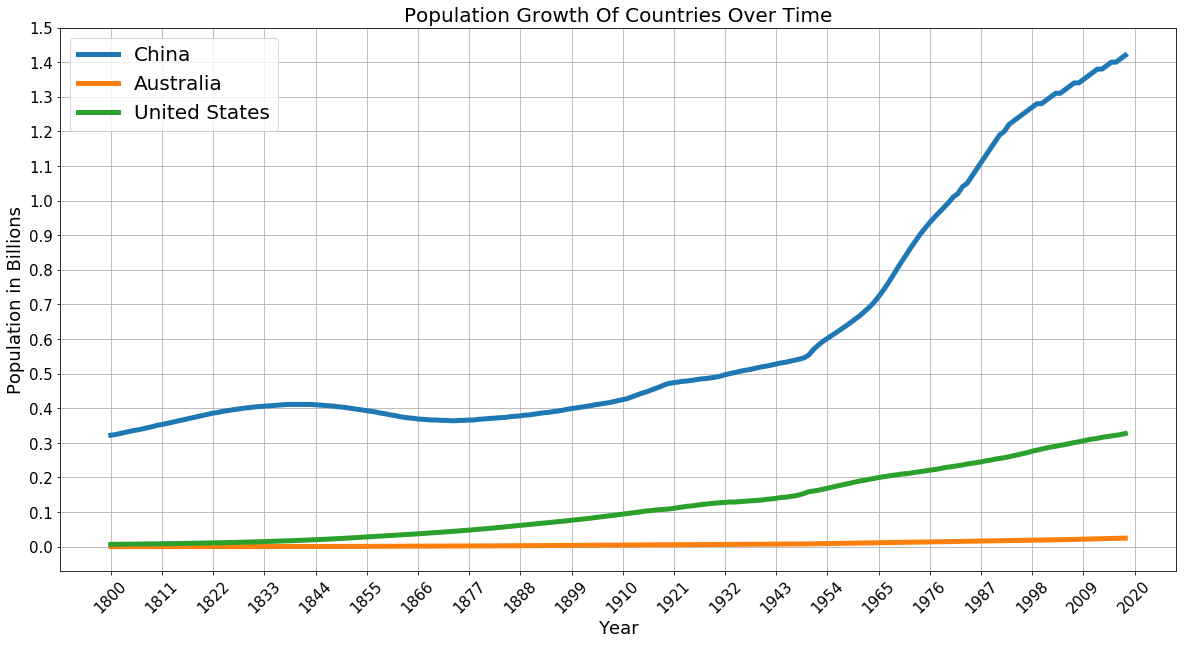

In [92]:
#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(formatValue = 1e9,divisions = 15,overallMin = 0.0,
                                                                  overallMax = 1.5e9)

#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(population.Year)

#Ploting the graph
plt.figure(figsize=(20,10))
plt.plot(population.Year, population.China, label = "China", linewidth=5.0)
plt.plot(population.Year, population.Australia, label = "Australia", linewidth=5.0)
plt.plot(population.Year, population['United States'], label = "United States", linewidth=5.0)
#Labeling the coordinates
plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize=15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Population in Billions',fontsize=18)
plt.title('Population Growth Of Countries Over Time',fontsize=20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

2.Fit a linear regression using Python to the Chinese population data and plot the linear fit.

--Does the linear fit look good?

--Use the linear fit to predict the resident population in China in 2020 and 2100.

--Instead of fitting the linear regression to all of the data, try fitting it to just the most recentdata points (say from 1960 onwards). How is the fit? Which model would give betterpredictions of future population in China do you think?

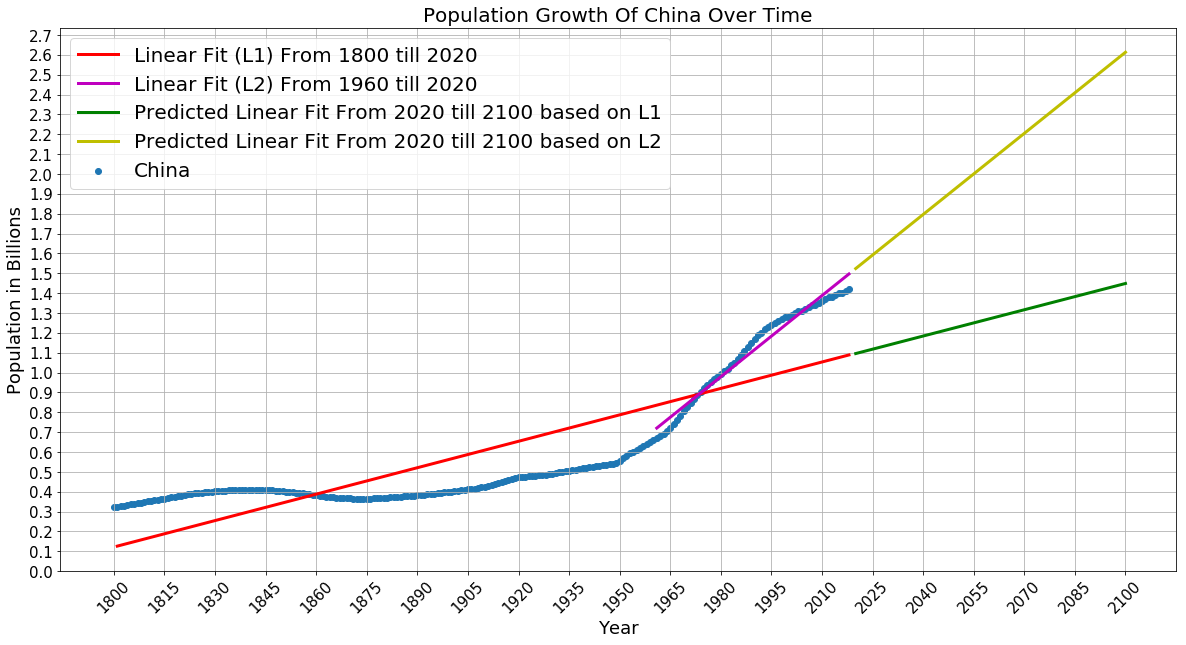

In [93]:
#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(formatValue = 1e9, divisions = 27, overallMin = 0.0,
                                                                   overallMax = 2.7e9)

#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(Values = population['Year'], overallMax=2100)

lineRegression = linregress(population['Year'], population['China'])

#Plotting the different lines and points
plt.figure(figsize = (20,10))
plotLinearFitBasedOnYear(population, "China", 1800, 2020, 'r-', lineRegression, "Linear Fit (L1)")
l2LineRegress = plotLinearFitBasedOnYear(population, "China", 1960, 2020, 'm-', [], "Linear Fit (L2)")
plotLinearFitBasedOnYear(population, "China", 2020, 2100, 'g-', lineRegression, "Predicted Linear Fit", " based on L1")
plotLinearFitBasedOnYear(population, "China", 2020, 2100, 'y-', l2LineRegress, "Predicted Linear Fit", " based on L2")
plt.scatter(population.Year, population.China, label = "China")

#Marking the x axis and y axis labels
plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize=15)
plt.yticks(yAxis, yAxisVariableNames, fontsize=15)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Population in Billions', fontsize=18)
plt.title('Population Growth Of China Over Time', fontsize=20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

# A2. Investigating the Gender Equality Data

Now have a look at the gender equality data.

1.Use Python to plot the gender ratio (women % men) in schools for Australia, China and UnitedStates over time.

--What are the maximum and minimum values for gender ratio in Australia over the timeperiod?

--How do you compare the trend in gender ratio (women % men) in schools for these three countries over the time period? Which two countries have similar growth trend?

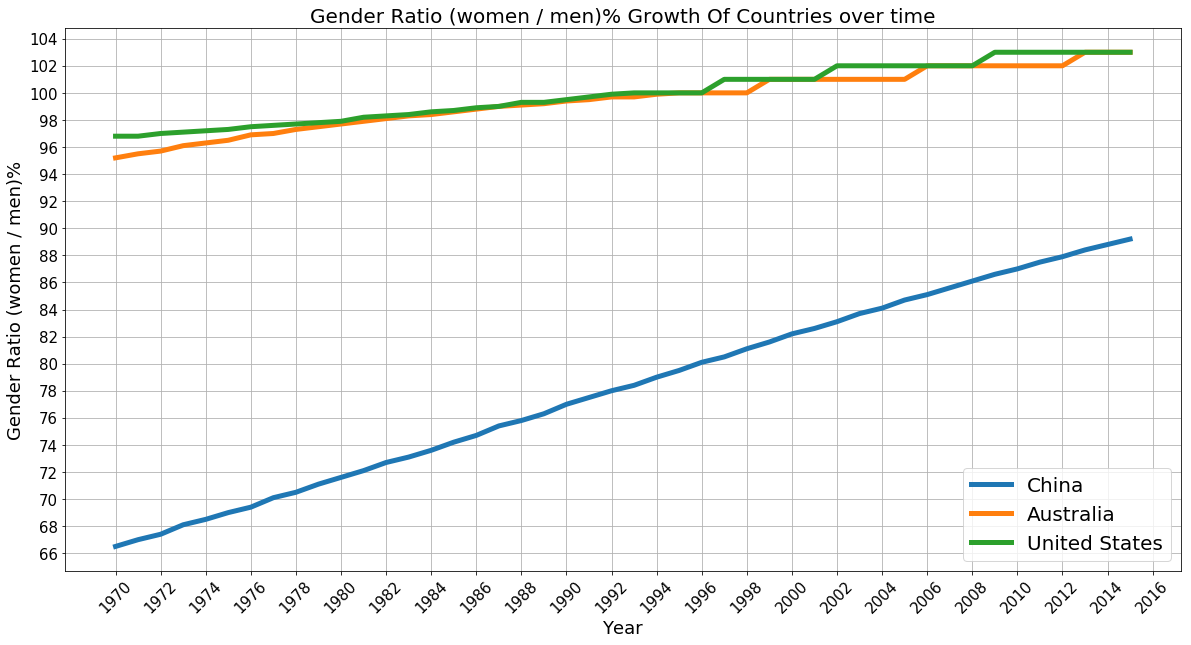

minimum  value for gender ratio in Australia: 95.2
maximum value for gender ratio in Australia: 103.0


In [94]:
china_min = genderEquality.China.agg('min')
china_max = genderEquality.China.agg('max')
australia_min = genderEquality.Australia.agg('min')
australia_max = genderEquality.Australia.agg('max')
us_min = genderEquality["United States"].agg('min')
us_max = genderEquality["United States"].agg('max')

ovMin = min(china_min, us_min, australia_min)
ovMax = max(china_max, us_max, australia_max)

#Finding the y axis label
yAxis,yAxisVariableNames = findAxisCordinatesAndNamesForTicks(divisions = 20, overallMin = ovMin, overallMax = ovMax)

#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(genderEquality.Year)

plt.figure(figsize=(20,10))
plt.plot(genderEquality.Year, genderEquality.China, label = "China", linewidth=5.0)
plt.plot(genderEquality.Year, genderEquality.Australia, label = "Australia", linewidth=5.0)
plt.plot(genderEquality.Year, genderEquality['United States'], label = "United States", linewidth=5.0)
plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize=15)
plt.yticks(yAxis, yAxisVariableNames, fontsize=15)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Gender Ratio (women / men)%', fontsize=18)
plt.title('Gender Ratio (women / men)% Growth Of Countries over time', fontsize=20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()
print("minimum  value for gender ratio in Australia: "+ str(australia_min))
print("maximum value for gender ratio in Australia: "+ str(australia_max))

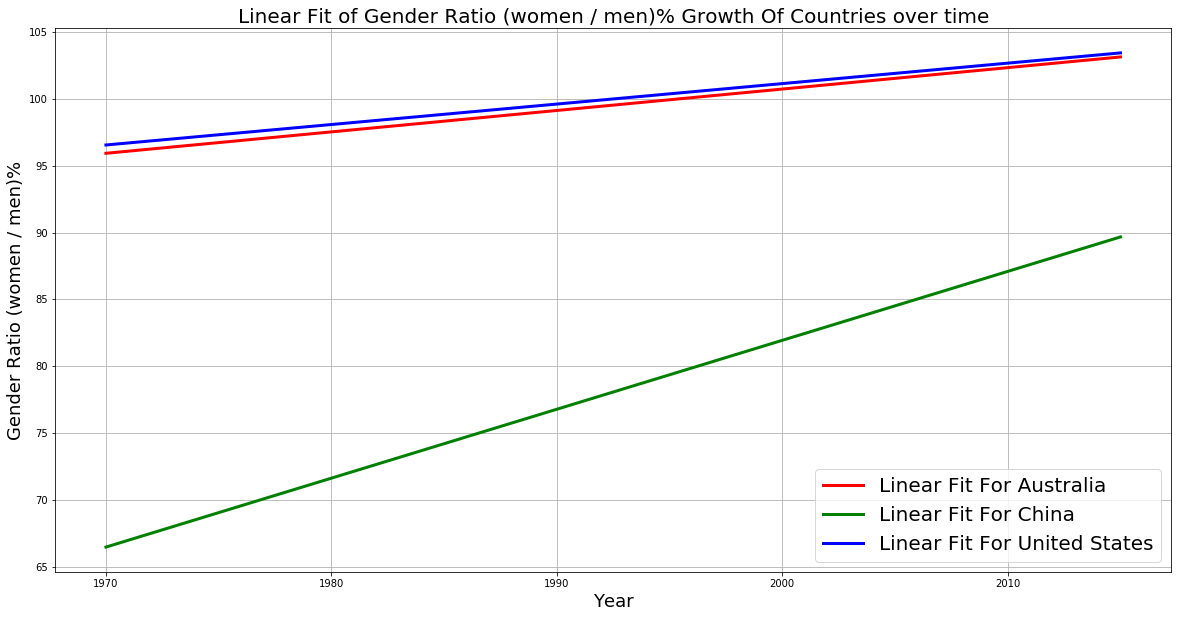

In [95]:
plt.figure(figsize = (20,10))
plotLinearFitBasedOnYear(genderEquality, "Australia", color = 'r-', linearFitLabel = "Linear Fit For Australia")
plotLinearFitBasedOnYear(genderEquality, "China", color = 'g-', linearFitLabel = "Linear Fit For China")
plotLinearFitBasedOnYear(genderEquality, "United States", color = 'b-', linearFitLabel = "Linear Fit For United States")

plt.xlabel('Year', fontsize = 18)
plt.ylabel('Gender Ratio (women / men)%', fontsize = 18)
plt.title('Linear Fit of Gender Ratio (women / men)% Growth Of Countries over time', fontsize = 20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

Since linear fit of both the Australia and us looks same we can say that both have similar growth trend compared to china

2.Fit a linear regression to the gender ratio in schools in United States and plot it.

--Does it look like a good fit to you? Would you believe the predictions of the linear model going forward?

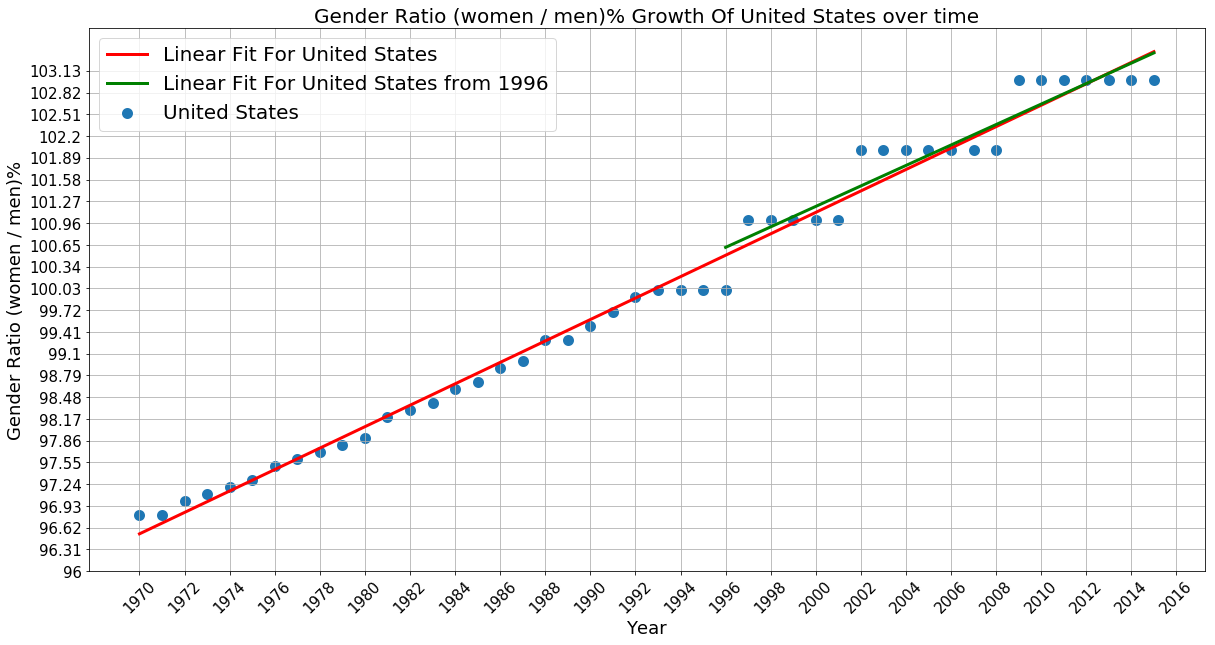

In [96]:
#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(genderEquality['United States'])

#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(genderEquality.Year)
latestGenderEquality = genderEquality[ genderEquality.Year > 1995 ]

plt.figure(figsize = (20,10))
plt.scatter(genderEquality.Year, genderEquality['United States'], label = "United States", linewidth=5.0)
plotLinearFitBasedOnYear(genderEquality, "United States", color = 'r-', linearFitLabel = "Linear Fit For United States")
plotLinearFitBasedOnYear(latestGenderEquality, "United States", color = 'g-', linearFitLabel = "Linear Fit For United States from 1996")
plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize=15)
plt.yticks(yAxis, yAxisVariableNames, fontsize=15)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Gender Ratio (women / men)%', fontsize=18)
plt.title('Gender Ratio (women / men)% Growth Of United States over time', fontsize=20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

Yes we can say that the regression looks like a good fit to you.I do believe the predictions of the linear model going forward because the linear fit for the last 10 years also matches the linear fit for entire period of 1970 to 2016.

# A3. Investigating the Income Data

Now have a look at the Income data.

1.Use Python to plot the Income of Australia, China and United States over time.

--What was the minimum income in China recorded in the dataset and when did that occur?What was the income in Australia in the same year?

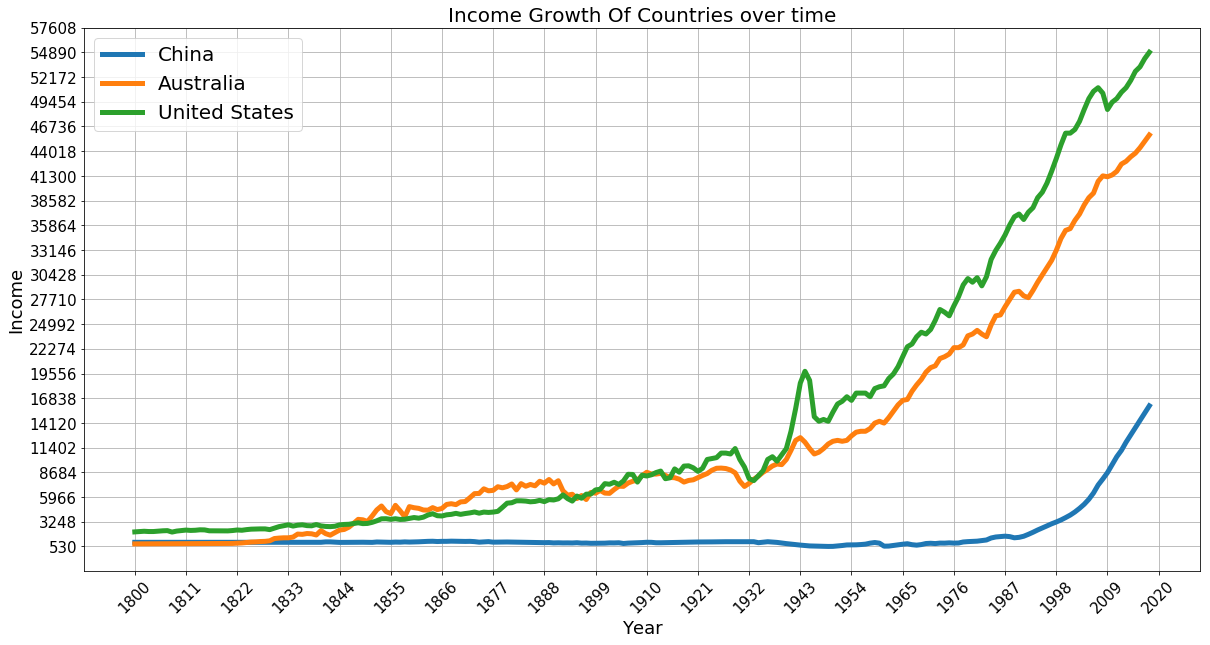

Minimum income value in China is 530 on 1949
On the same year income of Australia was 11800


In [97]:
china_min = income.China.agg('min')
china_min_year = int(income[income.China == china_min].Year)
china_max = income.China.agg('max')
australia_min = income.Australia.agg('min')
australia_max = income.Australia.agg('max')
australia_income_china_min = income[income.Year == china_min_year].Australia
us_min = income["United States"].agg('min')
us_max = income["United States"].agg('max')

ovMin = min(china_min, us_min, australia_min)
ovMax = max(china_max, us_max, australia_max)

#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(genderEquality["United States"], overallMin = ovMin
                                                                  , overallMax = ovMax)

#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(income.Year)

plt.figure(figsize=(20,10))
plt.plot(income.Year, income.China, label = "China", linewidth=5.0)
plt.plot(income.Year, income.Australia, label = "Australia", linewidth=5.0)
plt.plot(income.Year, income['United States'], label = "United States", linewidth=5.0)
plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize=15)
plt.yticks(yAxis, yAxisVariableNames, fontsize=15)

plt.xlabel('Year', fontsize=18)
plt.ylabel('Income', fontsize=18)
plt.title('Income Growth Of Countries over time',fontsize=20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()
print("Minimum income value in China is "+ str(china_min) + " on " + str(int(china_min_year)))
print("On the same year income of Australia was "+ str(int(australia_income_china_min)))

# A4. Visualising the Relationship between Gender Equality and Population

Now let's look at the relationship between gender ratio in schools and the population.

1.Use Python to combine the data from the different files into a single table. The table should contain population values, income and gender ratio in schools for the different years and different countries.

--What is the first year and last year for the combined data?

In [98]:
income = pd.melt(income, id_vars=['Year'],var_name='Countries')
income.rename(columns = {'value':'Income'}, inplace = True)
genderEquality = pd.melt(genderEquality, id_vars=['Year'], var_name='Countries')
genderEquality.rename(columns = {'value':'Gender Equality'}, inplace = True)
population = pd.melt(population, id_vars=['Year'], var_name='Countries')
population.rename(columns = {'value':'Population'}, inplace = True)
temp = pd.merge(income, genderEquality, how='inner', on=['Year','Countries'])
overalInfo = pd.merge(temp, population, how='inner', on=['Year','Countries'])

print("First year : ", overalInfo.Year.agg('min'))
print("Last year : ", overalInfo.Year.agg('max'))

First year :  1970
Last year :  2015


2.Now that you have the data aggregated, we can see whether there is a relationship between gender ratio in schools and the population. Plot the values against each other.

--Can you see a relationship there?

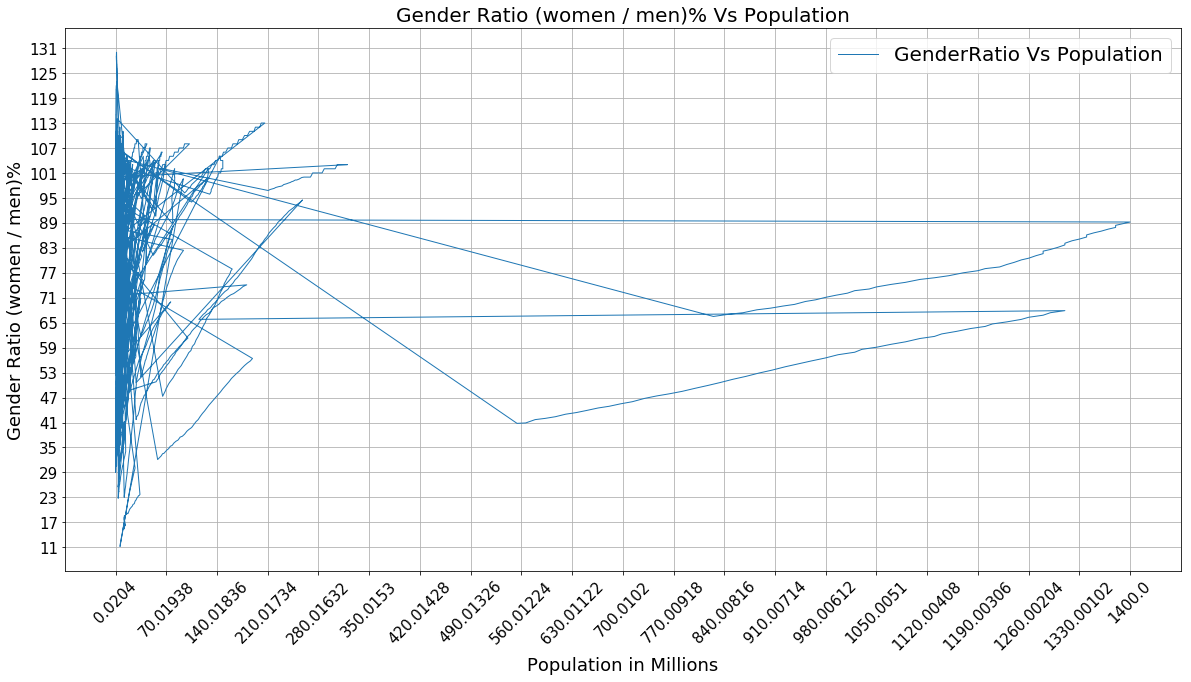

No we cant find out a proper relationship between population and gender ratio from the above graph


In [99]:
#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(overalInfo['Gender Equality'])

#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(overalInfo.Population,1e6)

plt.figure(figsize=(20,10))
plt.plot(overalInfo.Population, overalInfo['Gender Equality'], label = "GenderRatio Vs Population", linewidth=1.0)
plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Gender Ratio (women / men)%', fontsize=18)
plt.xlabel('Population in Millions', fontsize=18)
plt.title('Gender Ratio (women / men)% Vs Population', fontsize=20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()
print("No we cant find out a proper relationship between population and gender ratio from the above graph")


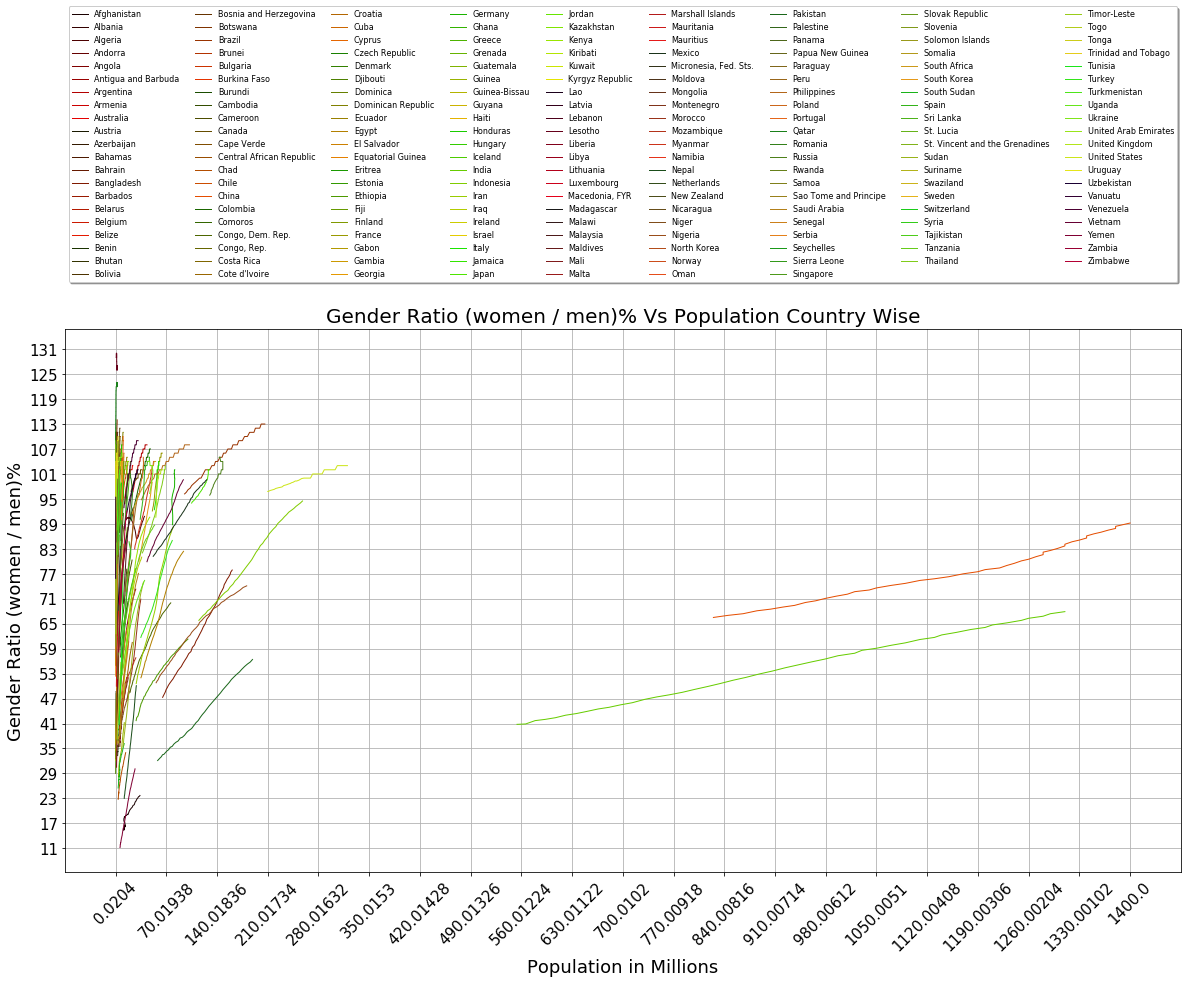

No we cant find out a proper relationship between population and gender ratio from the above graph since there is too much data


In [100]:
groupedInfo = overalInfo.groupby(['Countries'])

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(overalInfo['Gender Equality'])

#Finding the x axis label
ticks = findAxisCordinatesAndNamesForTicks(overalInfo.Population,1e6)
x_axis = ticks[0]
x_axis_variable_names =ticks[1]  

plt.figure(figsize = (20,10))
r = 0.0
g = 0.0
b = 0.0

for country,Info in groupedInfo:
    r += 0.1
    if(r > 0.9):
        r = 0.1
        g +=0.1
    if(g > 0.9):
        g = 0.0
        b += 0.1
    if(b > 0.9):
        b = 0.0
    plt.plot(Info.Population, Info['Gender Equality'], label = country, linewidth = 1.0, color = (r,g,b))

plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Gender Ratio (women / men)%', fontsize=18)
plt.xlabel('Population in Millions', fontsize=18)
plt.title('Gender Ratio (women / men)% Vs Population Country Wise', fontsize=20)
plt.legend(loc= 'upper center', ncol = 9, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.6), fontsize = 8)

plt.grid()
plt.show()
print("No we cant find out a proper relationship between population and gender ratio from the above graph since there is too much data")

3.Try selecting and plotting only the data from India.

--Can you see a relationship now? If so, what relationship is there?

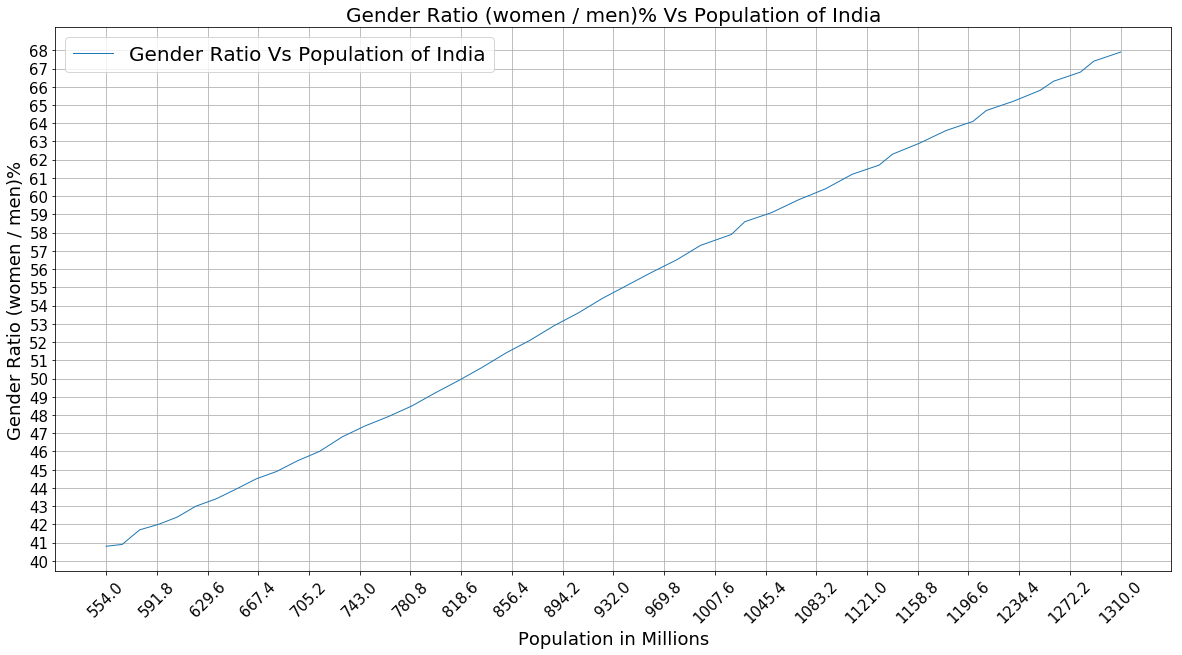

From The Above Graph we can see that as population Increases gender ratio (women % men) also keeps on increasing


In [101]:
overalInfoIndia = overalInfo[overalInfo['Countries'] == 'India']

#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(overalInfoIndia['Gender Equality'])

#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(overalInfoIndia.Population, 1e6)

plt.figure(figsize=(20,10))

plt.plot(overalInfoIndia.Population,overalInfoIndia['Gender Equality'], label = "Gender Ratio Vs Population of India", linewidth=1.0)
plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize=15)
plt.yticks(yAxis, yAxisVariableNames, fontsize=15)

plt.ylabel('Gender Ratio (women / men)%', fontsize=18)
plt.xlabel('Population in Millions', fontsize=18)
plt.title('Gender Ratio (women / men)% Vs Population of India', fontsize=20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()
print("From The Above Graph we can see that as population Increases gender ratio (women % men) also keeps on increasing")

# A5. Visualising the Relationship over Time

Now let's look at the relationship between gender ratio in schools and income over time.

1.Use Python to build a Motion Chart comparing the gender ratio in schools, the income, and the population of each country over time. The motion chart should show the gender ratio in schools on the x-axis, the income on the y-axis, and the bubble size should depend on the population.

In [102]:
mChart = MotionChart(df = overalInfo, key='Year', x='Gender Equality', y='Income', xscale='linear', yscale='linear',
                     size='Population', color='Countries', category='Countries')
mChart.to_notebook()

2.Run the visualisation from start to finish. (Hint: In Python, to speed up the animation, set timerbar next to the play/pause button to the minimum value.) And then answer the followingquestions:

--Which two countries generally have the lowest gender ratio (women % men) in schools?

--Which country has the highest gender ratio during the whole period of time?

--Is the gender ratio generally increasing or decreasing during the whole period of time? Howabout income? Explain your answer.

--Select Cape Verde and Bolivia for this question: From which year onwards does Cape Verdestart to have a higher gender ratio 
and a higher income from Bolivia. Please support your answerwith a relevant python code and motion chart.

--Is there generally a relationship between the amount of income and gender ratio (women %men) in schools in all countries during the whole period of time? What kind of relationship?Explain your answer.

--Any other interesting things you notice in the data? Please support your answer with relevantpython code and/or motion chart

Answers

--Yemen and Afganistan generally have the lowest  gender ratio(women % men) in schools. In 2015 yemen has ratio (30.1%) and afganistan has (23.7%). Whereas in 1970 Yemen has a gender ratio of (11.2%) and Afganistan has a ratio of (15.4%)
--Lesotho has the highest gender ratio during the whole period
--Gender ratio is generally increasing  during the whole period of time. Where as income if we look into over all image we can say the it is slightly increasing . For many countries with less population its keeps on fluctuating like sometime increasing whereas some time decreasing. 

In [103]:
filt =((overalInfo.Countries == 'Bolivia') | (overalInfo.Countries == "Cape Verde"))
boliviaAndCapeVerdeInfo = overalInfo[filt]

m2Chart = MotionChart(df = boliviaAndCapeVerdeInfo, key='Year', x='Gender Equality', y='Income', xscale='linear', yscale='linear',
                     size='Population', color='Countries', category='Countries')
m2Chart.to_notebook()

--Is there generally a relationship between the amount of income and gender ratio (women %men) in schools in all countries during the whole period of time? What kind of relationship?Explain your answer.
Answer
--Generally as income increases women%men also increases over the period of time


In [104]:
mChart = MotionChart(df = overalInfo, key='Year', x='Population', y='Income', xscale='linear', yscale='linear',
                     size='Population', color='Countries', category='Countries')
mChart.to_notebook()
print("we can see that as population increase income also increase")

we can see that as population increase income also increase


# Task B: Exploratory Analysis on Big Data

Load the InsuranceRates.csv data in Python and answer the following questions:

1.How many rows and columns are there?

2.How many years does the data cover? (Hint: pandas provides functionality to see 'unique' values.)

3.What are the possible values for 'Age'?

4.How many states are there?

5.How many insurance providers are there?

6.What are the average, maximum and minimum values for the monthly insurance premium cost for an individual? Do those values seem reasonable to you?

In [105]:
#importing csv for further processing
insuranceRates = pd.read_csv('InsuranceRates.csv')

In [106]:
insurance_shape = insuranceRates.shape
print("Total No of Rows : "+ str(insurance_shape[0]))
print("Total No of Columns : "+ str(insurance_shape[1]))

Total No of Rows : 12694445
Total No of Columns : 7


In [107]:
years_count = insuranceRates.BusinessYear.agg('nunique')
print("It covers around "+str(years_count)+" years of data.")

It covers around 3 years of data.


In [108]:
sorted_age_group = sorted(insuranceRates.Age.value_counts().index.tolist())
s = "The possible values of age are"
for i in range(0, len(sorted_age_group)):
    if(i == len(sorted_age_group)-2):
        s+=" and"
    elif(i != 0):
        s+=","
    s +=(" " + sorted_age_group[i])
print(s)
print("\nWhich can be further categorised into 4 categories ie (0-20) , (entries for ages between 21 - 64), (65 and over) and Family Option'")


The possible values of age are 0-20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64 and 65 and over, Family Option

Which can be further categorised into 4 categories ie (0-20) , (entries for ages between 21 - 64), (65 and over) and Family Option'


In [109]:
states_count = insuranceRates.StateCode.agg('nunique')
print("There are around "+str(states_count)+" states in this data.")

There are around 39 states in this data.


In [110]:
issuer_count = insuranceRates.IssuerId.agg('nunique')
print("There are around "+str(issuer_count)+" insurance providers in this data.")

There are around 910 insurance providers in this data.


In [111]:
individualRateMax = insuranceRates.IndividualRate.agg('max')
individualRateMin = insuranceRates.IndividualRate.agg('min')
individualRateMean = insuranceRates.IndividualRate.agg('mean')
print("Insurance plan rates for individual without considering tobacco user's stats are")
print("Minimum Rate :",individualRateMin)
print("Maximum Rate :",individualRateMax)
print("Average Rate :",individualRateMean)
print("both the values dosn't seem reasonable as both values are far away from the overall average")

Insurance plan rates for individual without considering tobacco user's stats are
Minimum Rate : 0.0
Maximum Rate : 999999.0
Average Rate : 4098.026458581588
both the values dosn't seem reasonable as both values are far away from the overall average


# B2. Investigating Individual Insurance Costs

Now let's look more in detail at the individual insurance costs.

1.Show the distribution of ‘IndividualRate’ values using a histogram.

--Does the distribution make sense to? What might be going on?

2.Remove rows with insurance premiums of 0 (or less) and over 2000. (Use this data from now on.)Generate a new histogram with a larger number of bins (say 200).

--Does this data look more sensible?

--Describe the data. How many groups can you see?

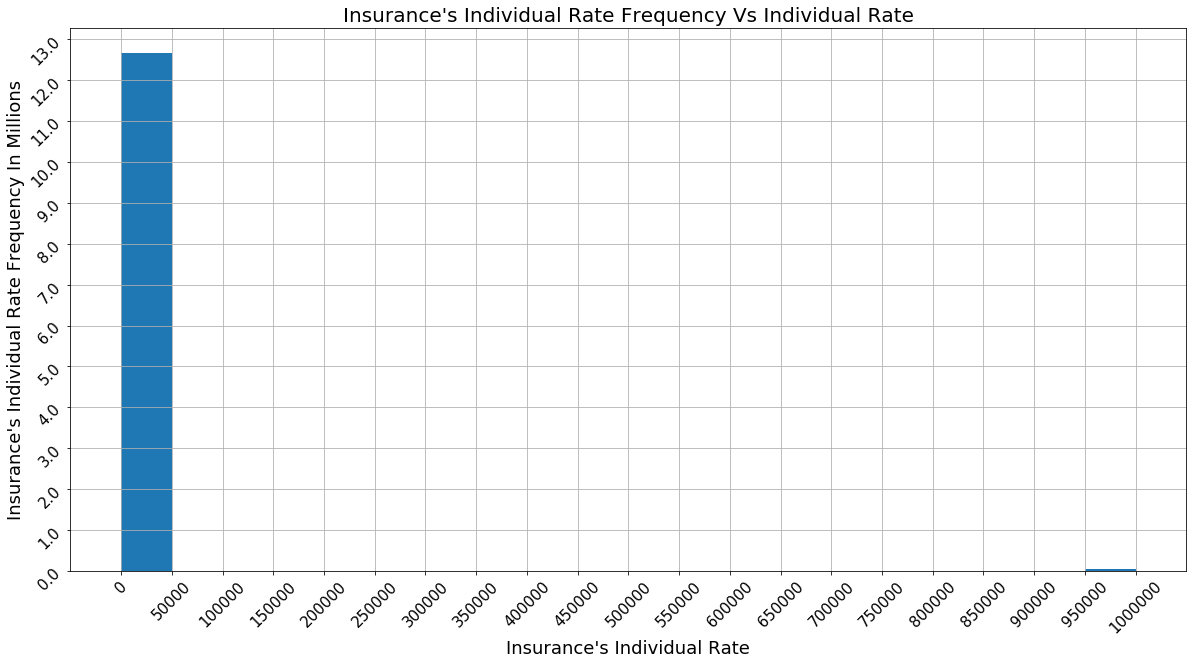

From The Above Graph we can see that as population Increases gender ratio (women % men) also keeps on increasing


In [112]:
#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(insuranceRates.IndividualRate)

#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(formatValue = 1e6,divisions = 13,overallMin = 0.0,
                                                                  overallMax = 1.3e7)

plt.figure(figsize=(20,10))

insuranceRates.IndividualRate.hist(bins = 20) # try different numbers of bins 
plt.xticks(xAxis, xAxisVariableNames,rotation = 45,fontsize=15)
plt.yticks(yAxis, yAxisVariableNames,rotation = 45,fontsize=15)

plt.ylabel('Insurance\'s Individual Rate Frequency In Millions',fontsize=18)
plt.xlabel('Insurance\'s Individual Rate',fontsize=18)
plt.title('Insurance\'s Individual Rate Frequency Vs Individual Rate',fontsize=20)
plt.show()
print("From The Above Graph we can see that as population Increases gender ratio (women % men) also keeps on increasing")  

In [113]:
#Removing the outliers from the data and thus filtering the insurance rates data
insuranceRates = insuranceRates[(insuranceRates.IndividualRate > 0) & (insuranceRates.IndividualRate < 2000)]

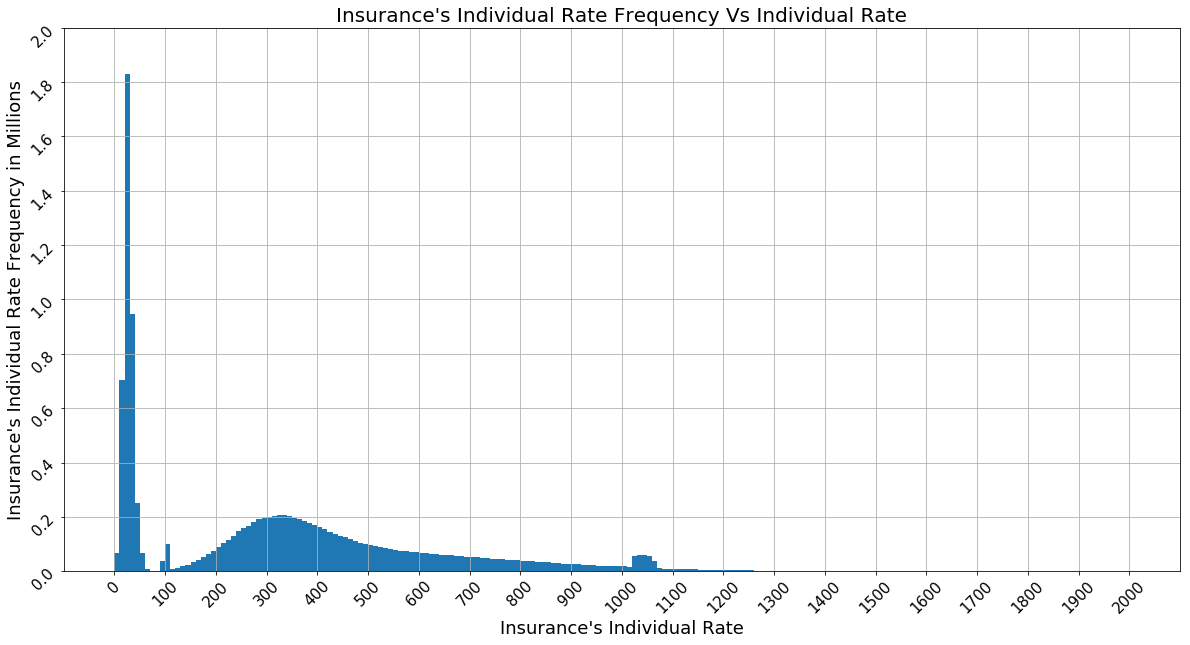

In [114]:
#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(insuranceRates.IndividualRate)

#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(formatValue = 1e6,divisions = 10,overallMin = 0.0,
                                                                  overallMax = 2e6)

plt.figure(figsize=(20,10))

insuranceRates.IndividualRate.hist(bins = 200) # try different numbers of bins 
plt.xticks(xAxis, xAxisVariableNames,rotation = 45,fontsize=15)
plt.yticks(yAxis, yAxisVariableNames,rotation = 45,fontsize=15)

plt.ylabel('Insurance\'s Individual Rate Frequency in Millions',fontsize=18)
plt.xlabel('Insurance\'s Individual Rate',fontsize=18)
plt.title('Insurance\'s Individual Rate Frequency Vs Individual Rate',fontsize=20)
plt.show()

# B3. Variation in Costs across States

How do insurance costs vary across states?

1.Generate a graph containing boxplots summarising the distribution of values for each state.

--Which state has the lowest median insurance rates and which one has the highest? (Hint:you may need to rotate the state labels to be able to read the plot.)

2.Does the number of insurance issuers vary greatly across states?

--Create a bar chart of the number of insurance companies in each state to see. (Hint: you willneed to aggregate the data by state to do this.)

3.Could competition explain the difference in insurance premiums across states?

--Use a scatterplot to plot the number of insurance issuers against the median insurance costfor each state.

--Do you observe a relationship?

<Figure size 1440x720 with 0 Axes>

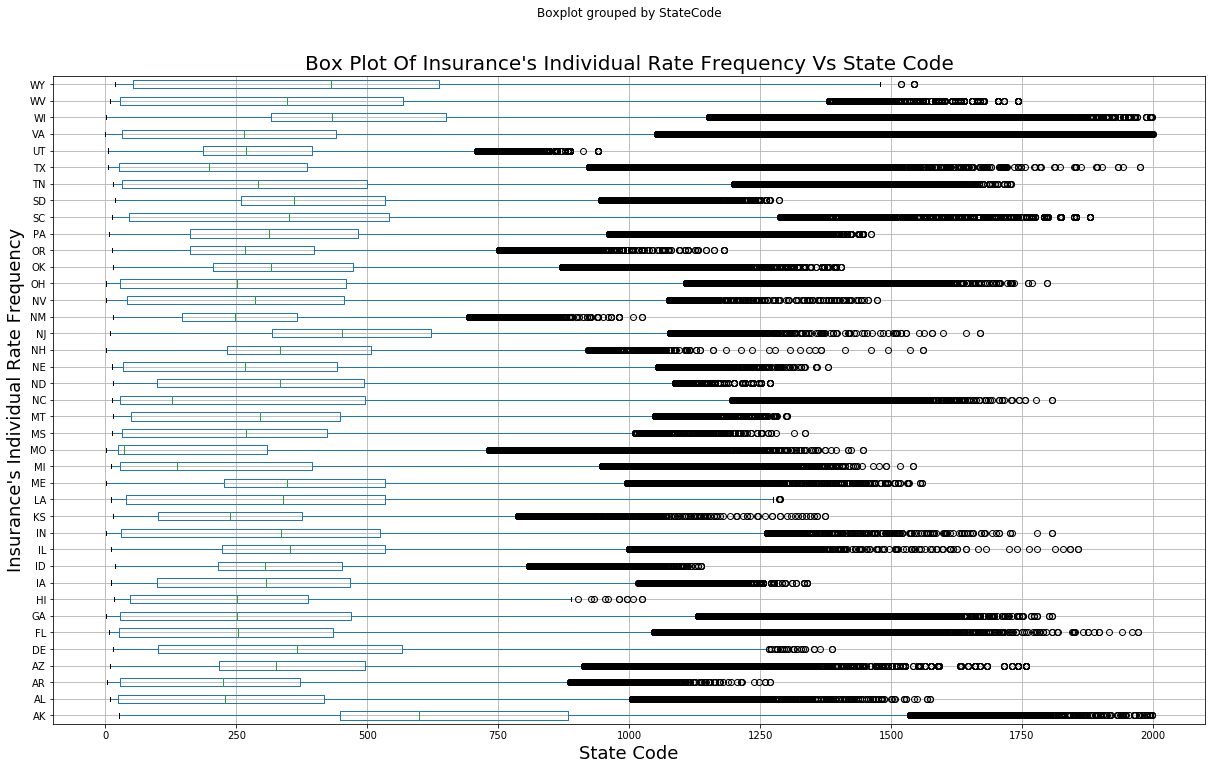

In [115]:
plt.figure(figsize=(20,10))
insuranceRates.boxplot(column = 'IndividualRate', by = 'StateCode',vert=False,figsize=(20,12),widths = .5)
plt.ylabel('Insurance\'s Individual Rate Frequency',fontsize=18)
plt.xlabel('State Code',fontsize=18)
plt.title('Box Plot Of Insurance\'s Individual Rate Frequency Vs State Code',fontsize=20)
plt.show()

In [116]:
print("State AK has the highest median insurance rate")
print("State MO has the lowest median insurance rate")

State AK has the highest median insurance rate
State MO has the lowest median insurance rate


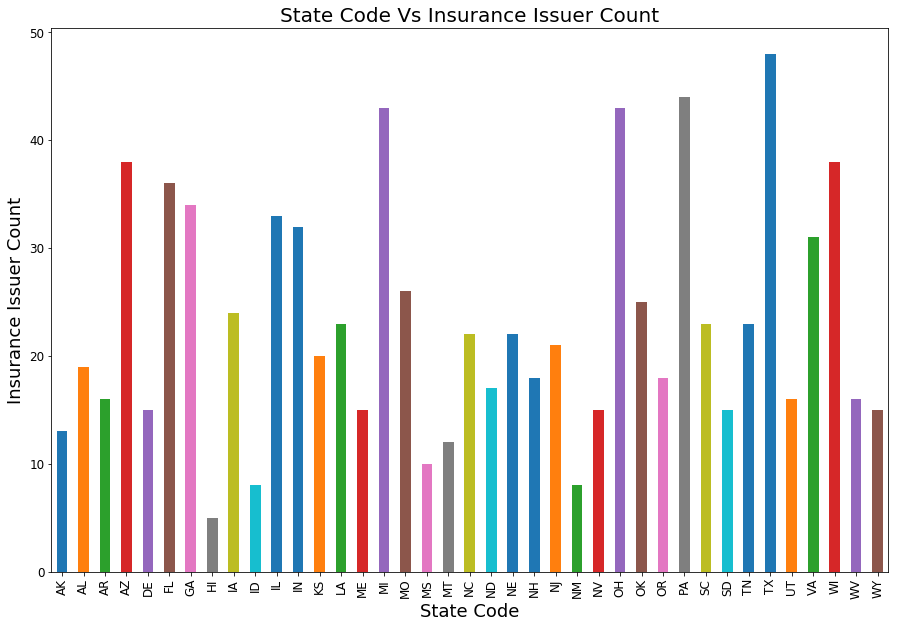

Yes the no of Issuers varry greatly across the states


In [117]:
insuranceRatesGrouped = insuranceRates.groupby(['StateCode'])['IssuerId'].agg('nunique').reset_index()
insuranceRatesGrouped.plot.bar(x='StateCode',y='IssuerId',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Insurance Issuer Count',fontsize=18)
plt.xlabel('State Code',fontsize=18)
plt.title('State Code Vs Insurance Issuer Count',fontsize=20)
plt.show()
print("Yes the no of Issuers varry greatly across the states")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


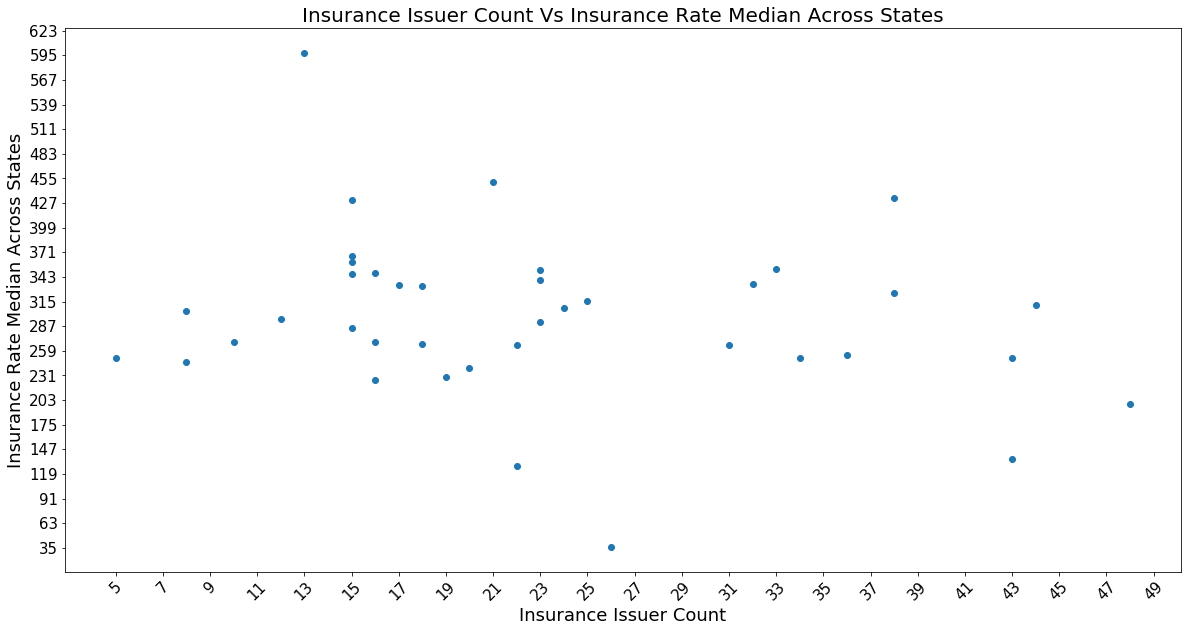

None
Overall Median is :  306.97


In [118]:
fun = {'IssuerId':{'Issuer count': 'nunique'},'IndividualRate':{'Insurance Rate Median': 'median'}}
insuranceRatesGrouped = insuranceRates.groupby(['StateCode']).agg(fun).reset_index()
insuranceRatesGrouped.columns = insuranceRatesGrouped.columns.droplevel(0)        # drop the top level in column hierarchy
insuranceRatesGrouped.rename(columns = {'':'StateCode'},inplace = True)

#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(insuranceRatesGrouped['Issuer count'])

#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(insuranceRatesGrouped['Insurance Rate Median'])

plt.figure(figsize = (20,10))

plt.scatter(insuranceRatesGrouped['Issuer count'],insuranceRatesGrouped['Insurance Rate Median'])
plt.xticks(xAxis, xAxisVariableNames,rotation = 45,fontsize=15)
plt.yticks(yAxis, yAxisVariableNames,fontsize=15)

plt.xlabel('Insurance Issuer Count',fontsize=18)
plt.ylabel('Insurance Rate Median Across States',fontsize=18)
plt.title('Insurance Issuer Count Vs Insurance Rate Median Across States',fontsize=20)
print(plt.show())

print("Overall Median is : ",insuranceRates['IndividualRate'].agg('median'))


# B4. Variation in Costs over Time and with Age

Generate boxplots (or other plots) of insurance costs versus year and age to answer the following questions:

1.Are insurance policies becoming cheaper or more expensive over time?

--Is the median insurance cost increasing or decreasing?

2.How does insurance costs vary with the age of the person being insured? (Hint: filter out thevalue 'Family Option' before plotting the data.)

--In terms of median cost, do older people pay more or less for insurance than younger people? How much more/less to they pay?

<Figure size 1440x720 with 0 Axes>

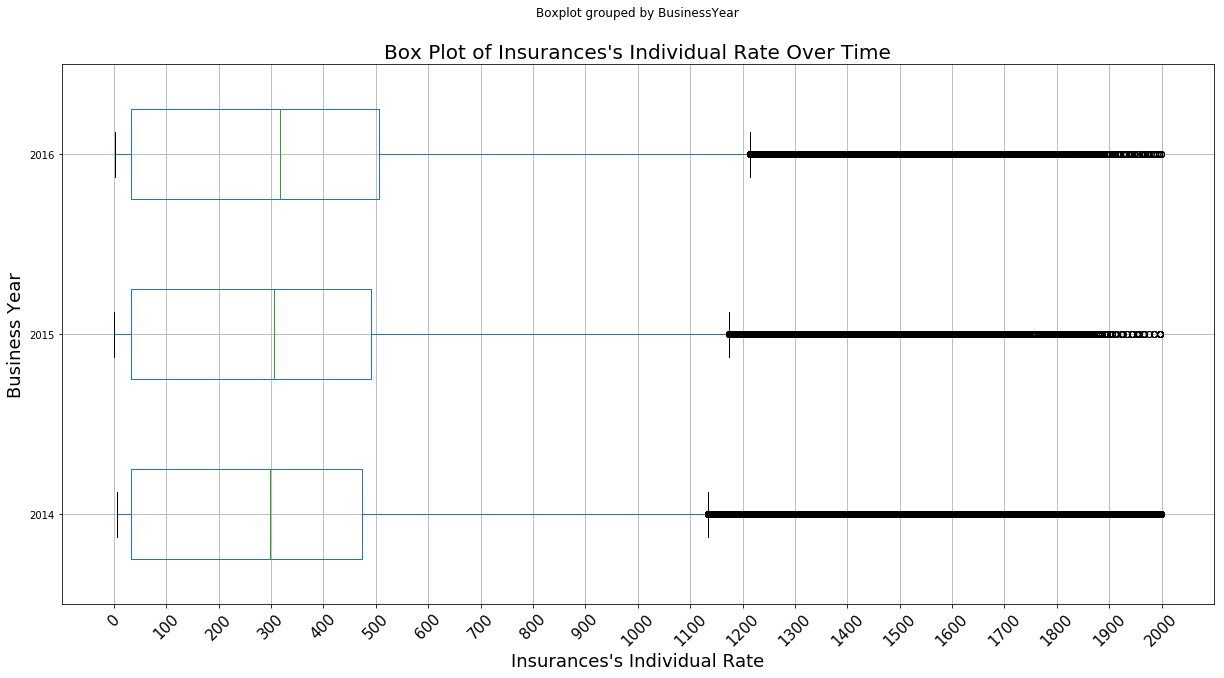

None
median insurance cost is slightly increasing over time 


In [119]:
#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(insuranceRates['IndividualRate'])

plt.figure(figsize=(20,10))
insuranceRates.boxplot(column = 'IndividualRate', by = 'BusinessYear',vert=False,figsize=(20,10),widths = .5)
plt.xticks(xAxis, xAxisVariableNames,rotation = 45,fontsize=15)

plt.xlabel('Insurances\'s Individual Rate', fontsize = 18)
plt.ylabel('Business Year', fontsize = 18)
plt.title('Box Plot of Insurances\'s Individual Rate Over Time', fontsize = 20)
print(plt.show())
print("median insurance cost is slightly increasing over time ")

<Figure size 1440x720 with 0 Axes>

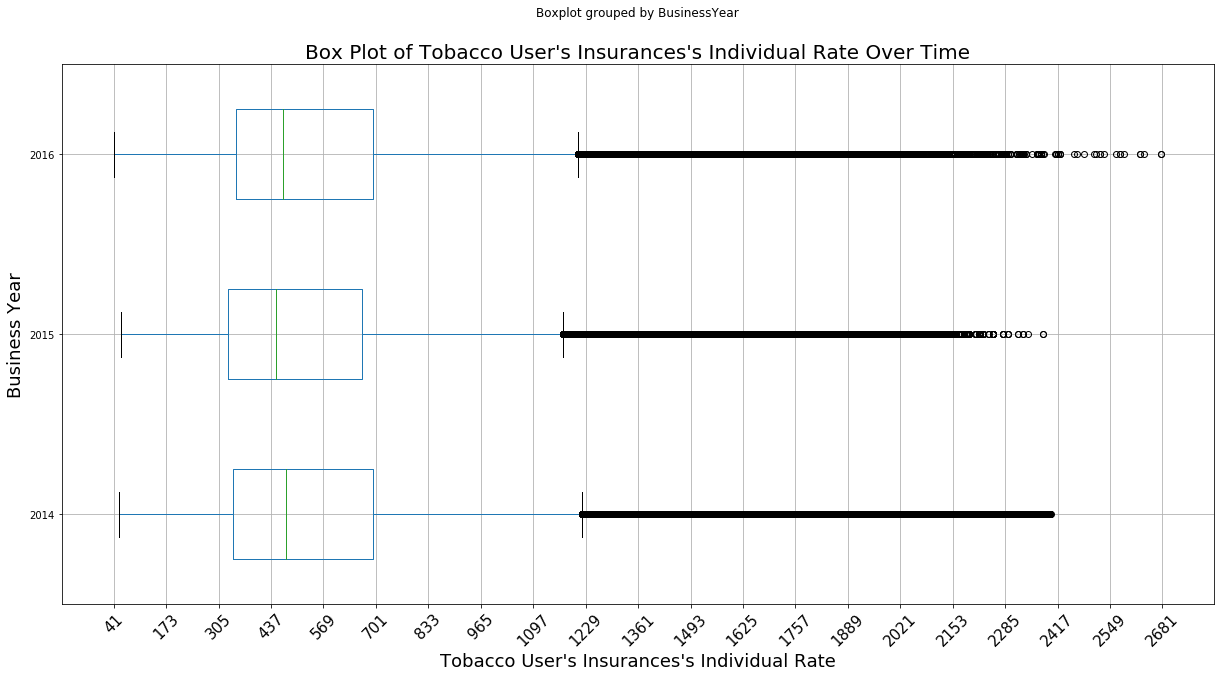

None
median insurance cost for Tobacco users intially decreases then increases over time 


In [120]:
#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(insuranceRates['IndividualTobaccoRate'])

plt.figure(figsize=(20,10))
insuranceRates.boxplot(column = 'IndividualTobaccoRate', by = 'BusinessYear',vert=False,figsize=(20,10),widths = .5)
plt.xticks(xAxis, xAxisVariableNames,rotation = 45,fontsize=15)
plt.xlabel('Tobacco User\'s Insurances\'s Individual Rate', fontsize = 18)
plt.ylabel('Business Year', fontsize = 18)
plt.title('Box Plot of Tobacco User\'s Insurances\'s Individual Rate Over Time', fontsize = 20)
print(plt.show())
print("median insurance cost for Tobacco users intially decreases then increases over time ")

<Figure size 1440x720 with 0 Axes>

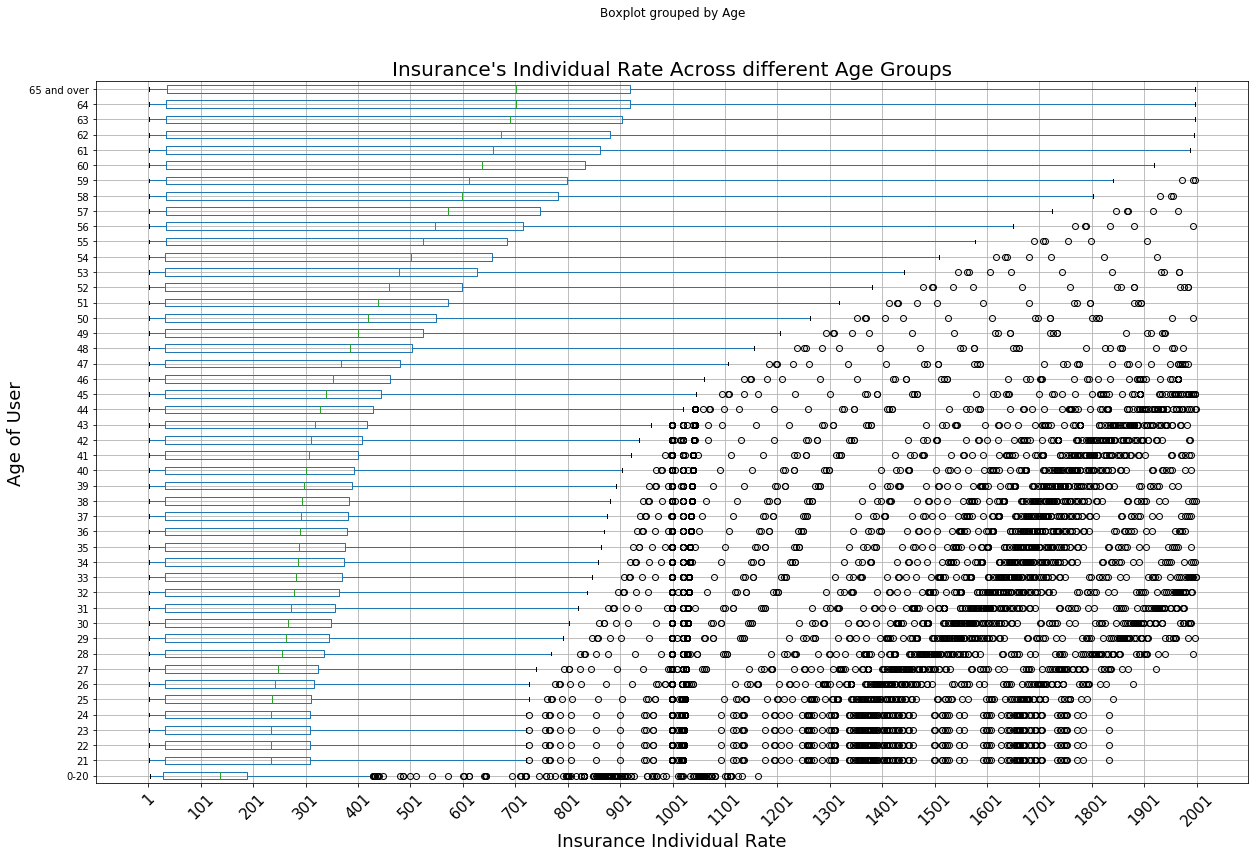

None
Median of old user's (65 and over) Insurance Individual Rate is  702.215
Median of young user's (0-20) Insurance Individual Rate of users is  138.59
Difference of Median of old user's (65 and over) to that of young user's (0-20) Insurance Individual Rate is 
Value :  563.625
In Percentage :  506.69 %


In [121]:
newInsuranceRates = insuranceRates[(insuranceRates.IndividualRate > 0) & (insuranceRates.IndividualRate < 2000) & (insuranceRates.Age != 'Family Option') ]

#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(newInsuranceRates['IndividualRate'])

inssuranceRateOldMedianAgg = newInsuranceRates[ newInsuranceRates['Age'] == '65 and over']['IndividualRate'].agg('median')
inssuranceRateYoungMedianAgg = newInsuranceRates[newInsuranceRates['Age'] == '0-20']['IndividualRate'].agg('median')

plt.figure(figsize=(20,10))
newInsuranceRates.boxplot(column = 'IndividualRate', by = 'Age',vert=False,figsize=(20,13),widths = .5)
plt.xticks(xAxis, xAxisVariableNames,rotation = 45,fontsize=15)
plt.xlabel('Insurance Individual Rate',fontsize=18)
plt.ylabel('Age of User',fontsize=18)
plt.title('Insurance\'s Individual Rate Across different Age Groups',fontsize=20)
print(plt.show())
print("Median of old user's (65 and over) Insurance Individual Rate is ",inssuranceRateOldMedianAgg)
print("Median of young user's (0-20) Insurance Individual Rate of users is ",inssuranceRateYoungMedianAgg)
print("Difference of Median of old user's (65 and over) to that of young user's (0-20) Insurance Individual Rate is ")
print("Value : ",inssuranceRateOldMedianAgg - inssuranceRateYoungMedianAgg)
print("In Percentage : ",round((inssuranceRateOldMedianAgg / inssuranceRateYoungMedianAgg)*100,2),"%")

<Figure size 1440x720 with 0 Axes>

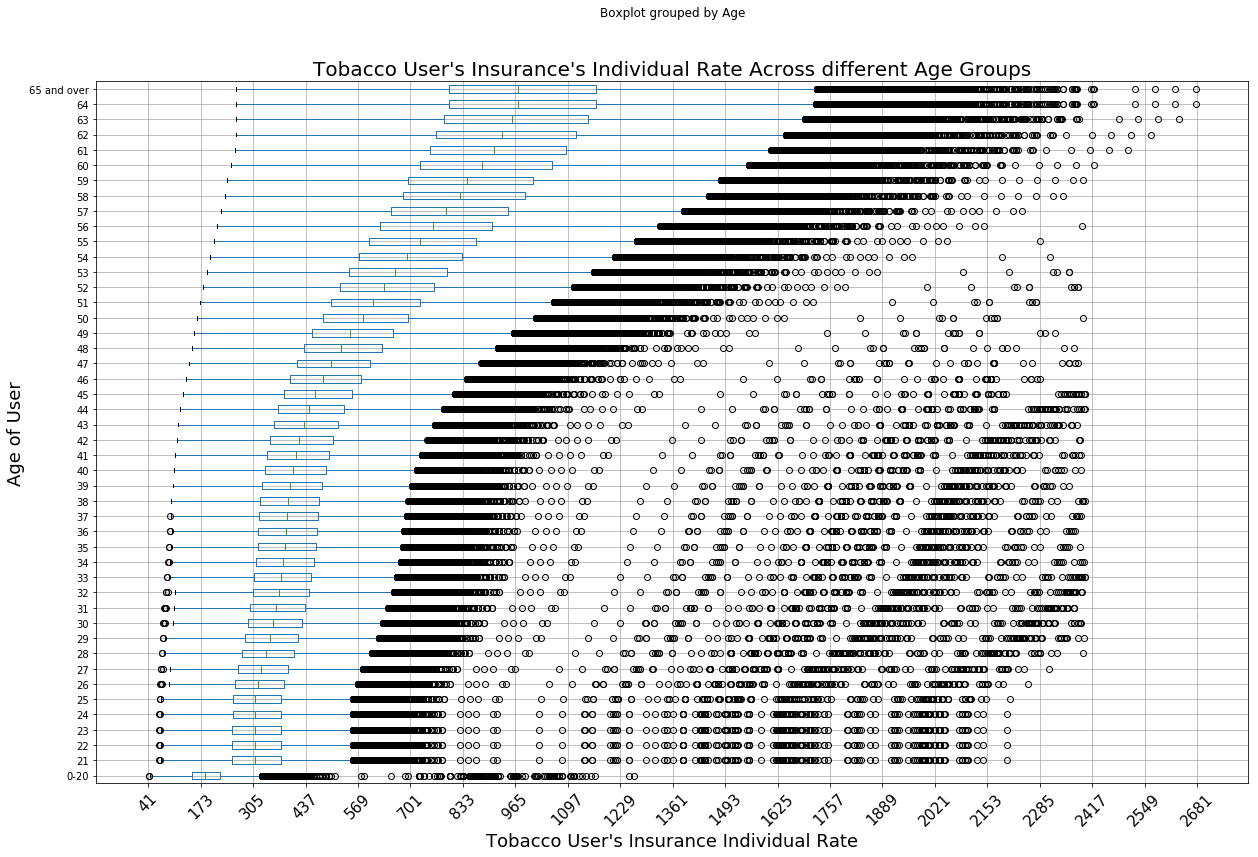

None
Median of old user's (65 and over) Insurance Individual Rate having tobacco is  972.515
Median of young user's (0-20) Insurance Individual Rate of users having tobacco is  184.36
Difference of Median of old user's (65 and over) to that of young user's (0-20) Insurance Individual Rate having tobacco is 
Value :  788.155
In Percentage :  527.51 %


In [122]:
#Finding the x axis label
xAxis, xAxisVariableNames = findAxisCordinatesAndNamesForTicks(newInsuranceRates['IndividualTobaccoRate'])

inssuranceRateOldMedianAgg = newInsuranceRates[ newInsuranceRates['Age'] == '65 and over']['IndividualTobaccoRate'].agg('median')
inssuranceRateYoungMedianAgg = newInsuranceRates[newInsuranceRates['Age'] == '0-20']['IndividualTobaccoRate'].agg('median')

plt.figure(figsize=(20,10))
newInsuranceRates.boxplot(column = 'IndividualTobaccoRate', by = 'Age', vert = False, figsize = (20,13), widths = .5)
plt.xticks(xAxis, xAxisVariableNames,rotation = 45,fontsize=15)
plt.xlabel('Tobacco User\'s Insurance Individual Rate',fontsize=18)
plt.ylabel('Age of User',fontsize=18)
plt.title('Tobacco User\'s Insurance\'s Individual Rate Across different Age Groups',fontsize=20)
print(plt.show())
print("Median of old user's (65 and over) Insurance Individual Rate having tobacco is ",inssuranceRateOldMedianAgg)
print("Median of young user's (0-20) Insurance Individual Rate of users having tobacco is ",inssuranceRateYoungMedianAgg)
print("Difference of Median of old user's (65 and over) to that of young user's (0-20) Insurance Individual Rate having tobacco is ")
print("Value : ",inssuranceRateOldMedianAgg - inssuranceRateYoungMedianAgg)
print("In Percentage : ",round((inssuranceRateOldMedianAgg / inssuranceRateYoungMedianAgg)*100,2),"%")

# Task C: Exploratory Analysis on Other Data

(Note: This additional task is for those students wishing to get higher grades for their assessment. It is not required to pass the assignment, but it is required to get higher credit. Please refer to the marking rubrics for more details)

Find some publicly available data and repeat some of the analysis performed in Tasks A and B above. Good sources of data are government websites, such as: data.gov.au, data.gov, data.gov.in, data.gov.uk, ...

Please note that your analysis should at least contain visualisation, interpretation of your visualisation and a prediction task.

# Notifiable Infectious Diseases Reports in UK From 2016 - 2018 July

Data Description : Notifiable Infectious Diseases Reports in UK For past Three years

Published by: OpenDataNI 

Last updated: 27 July 2018 

Topic: Health Licence: Open Government Licence

Summary

Cumulative data showing the breakdown of the notifiable infectious diseases reported to Public Health. The report is based on figures recorded by the Duty Room and Surveillance and is generated on a weekly basis.

Source Link : https://data.gov.uk/dataset/6bf61328-a250-44fd-a787-481503f02865/notifiable-infectious-diseases-reports

In [123]:
#defining a pre defined Function to extract data and format its values
def getDataFrameFromCsv(fileName):
    week = pd.read_csv(fileName)
    week = pd.melt(week, id_vars=['Disease','2018','2017','2016'],var_name='Week Number')
    week.rename(columns = {'value':'Weekly Report'}, inplace = True)
    week = pd.melt(week, id_vars=['Disease','Week Number','Weekly Report'],var_name='Year')
    week.rename(columns = {'value':'Yearly Report'}, inplace = True)
    return week

#defining a pre defined Function to append two dataFrame
def mergeTwoDataFrame(df1,df2):
    return df1.append(df2)

In [124]:
#Importing Csv's For Further Processing
dataWithTotal = getDataFrameFromCsv('noids-report-2018-week-26.csv')
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2017-18-week-1--3.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-week-5to8.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2017-18-week-18.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2017-2018-week-9.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2017-2018-week-10.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2017-2018-week-11.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2017-2018-week-12.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2017-2018-week-13.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2018-week-14.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2018-week-15.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2018-week-16.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2018-week-17.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2018-week-19.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2018-week-20.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2018-week-22.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2018-wk-23.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2018-wk-25.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-week-24.csv'))
dataWithTotal = mergeTwoDataFrame(dataWithTotal,getDataFrameFromCsv('noids-report-2017-2018-wk-21.csv'))
dataWithTotal = dataWithTotal.sort_values(by=['Week Number'],ascending =True)
data = dataWithTotal[dataWithTotal['Disease'] != 'Total']
data.head()

,Disease,Week Number,Weekly Report,Year,Yearly Report
101,Tuberculosis (Non Pulmonary),Week 01,0,2018,0
102,Typhoid,Week 01,0,2018,0
103,Typhus,Week 01,0,2018,0
104,Viral Haemorraghic Fever,Week 01,0,2018,0
105,Whooping Cough,Week 01,0,2018,2


Plotting Weekly Death Rate Vs Week Number in Year 2018 For Various Infectious diseases

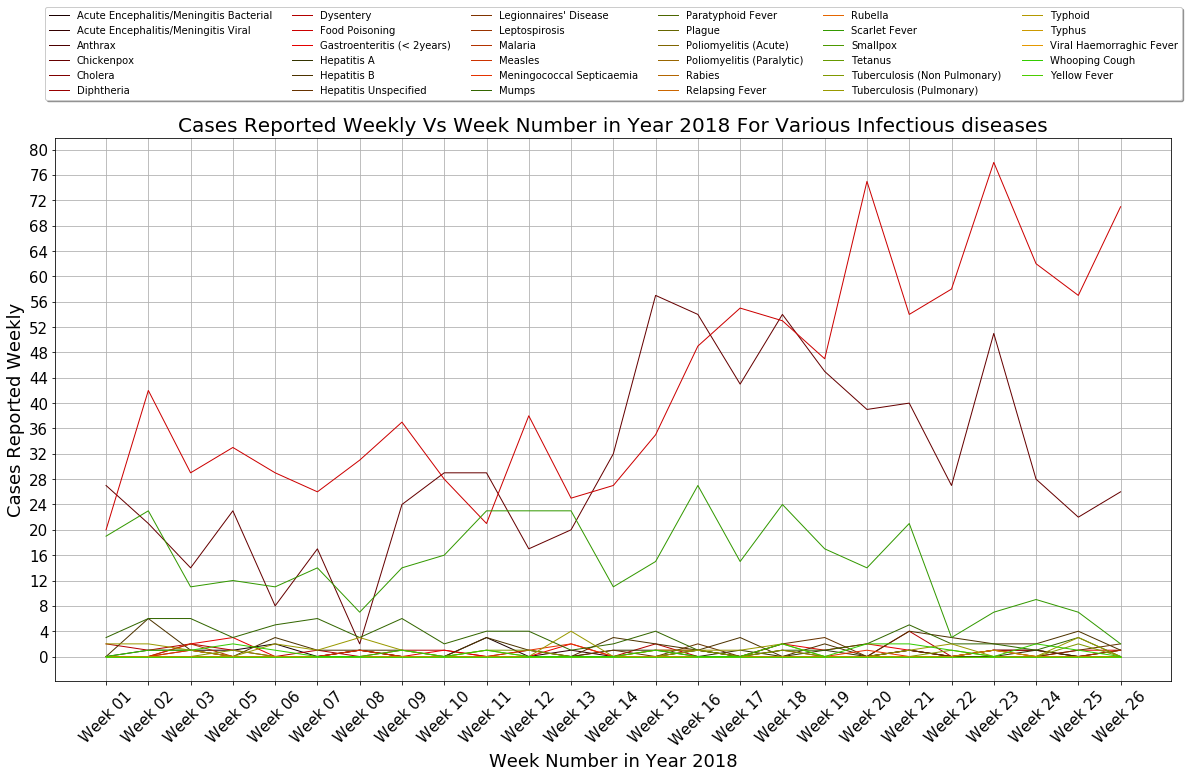

In [125]:
#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(data['Weekly Report'])


#Ploting the graph
groupedByDisease = data.groupby(['Disease'])

plt.figure(figsize = (20,10))
r = 0.0
g = 0.0
b = 0.0

for Disease,Info in groupedByDisease:
    r += 0.1
    if(r > 0.9):
        r = 0.2
        g +=0.2
    if(g > 0.9):
        g = 0.0
        b += 0.2
    if(b > 0.9):
        b = 0.0
    plt.plot(Info['Week Number'], Info['Weekly Report'], label = Disease, linewidth = 1.0, color = (r,g,b))

plt.xticks(rotation = 45,fontsize = 15 )
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Cases Reported Weekly', fontsize=18)
plt.xlabel('Week Number in Year 2018', fontsize=18)
plt.title('Cases Reported Weekly Vs Week Number in Year 2018 For Various Infectious diseases', fontsize=20)
plt.legend(loc= 'upper center', ncol = 6, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.25), fontsize = 10)

plt.grid()
plt.show()

<Figure size 1440x720 with 0 Axes>

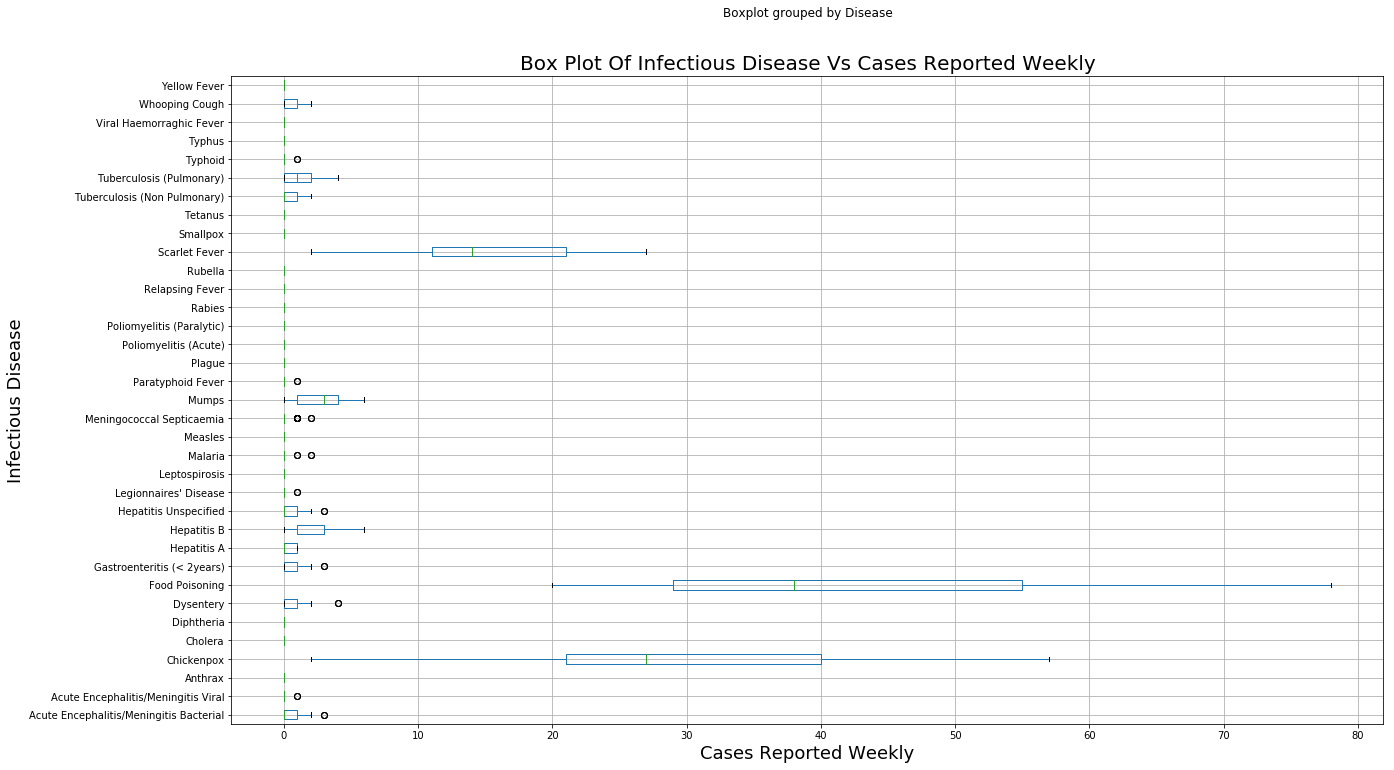

In [126]:
plt.figure(figsize=(20,10))
data.boxplot(column = 'Weekly Report', by = 'Disease',vert=False,figsize=(20,12),widths = .5)
plt.ylabel('Infectious Disease',fontsize=18)
plt.xlabel('Cases Reported Weekly',fontsize=18)
plt.title('Box Plot Of Infectious Disease Vs Cases Reported Weekly',fontsize=20)
plt.show()

From this Figure it is evident that for the year currently the magor infectious disease that acts as a treat are chickenpox,Food Poisoning and Scarlet Fever

In [127]:
filt =((data['Disease'] == 'Chickenpox') | (data['Disease'] == 'Food Poisoning') | (data['Disease'] == 'Scarlet Fever') )
majorDiseaseData = data[filt]

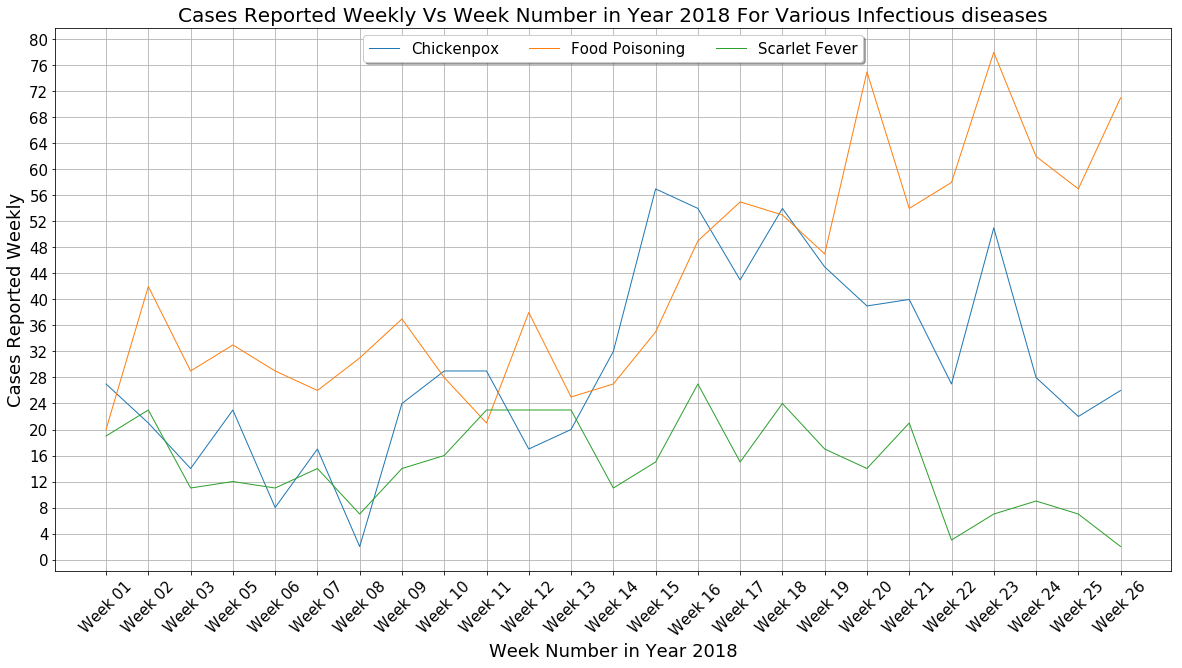

In [128]:
#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(data['Weekly Report'])


#Ploting the graph
MajorDiseaseGroupedByDisease = majorDiseaseData.groupby(['Disease'])

plt.figure(figsize = (20,10))
i=0
color = 'r-'
for Disease,Info in MajorDiseaseGroupedByDisease:
    if(i == 1):
        color = 'g-'
        i +=1
    if(i == 2):
        color = 'b-'
        i +=1   
    plt.plot(Info['Week Number'], Info['Weekly Report'], label = Disease, linewidth = 1.0)

plt.xticks(rotation = 45,fontsize = 15 )
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Cases Reported Weekly', fontsize=18)
plt.xlabel('Week Number in Year 2018', fontsize=18)
plt.title('Cases Reported Weekly Vs Week Number in Year 2018 For Various Infectious diseases', fontsize=20)
plt.legend(loc= 'upper center', ncol = 6, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1), fontsize = 15)

plt.grid()
plt.show()

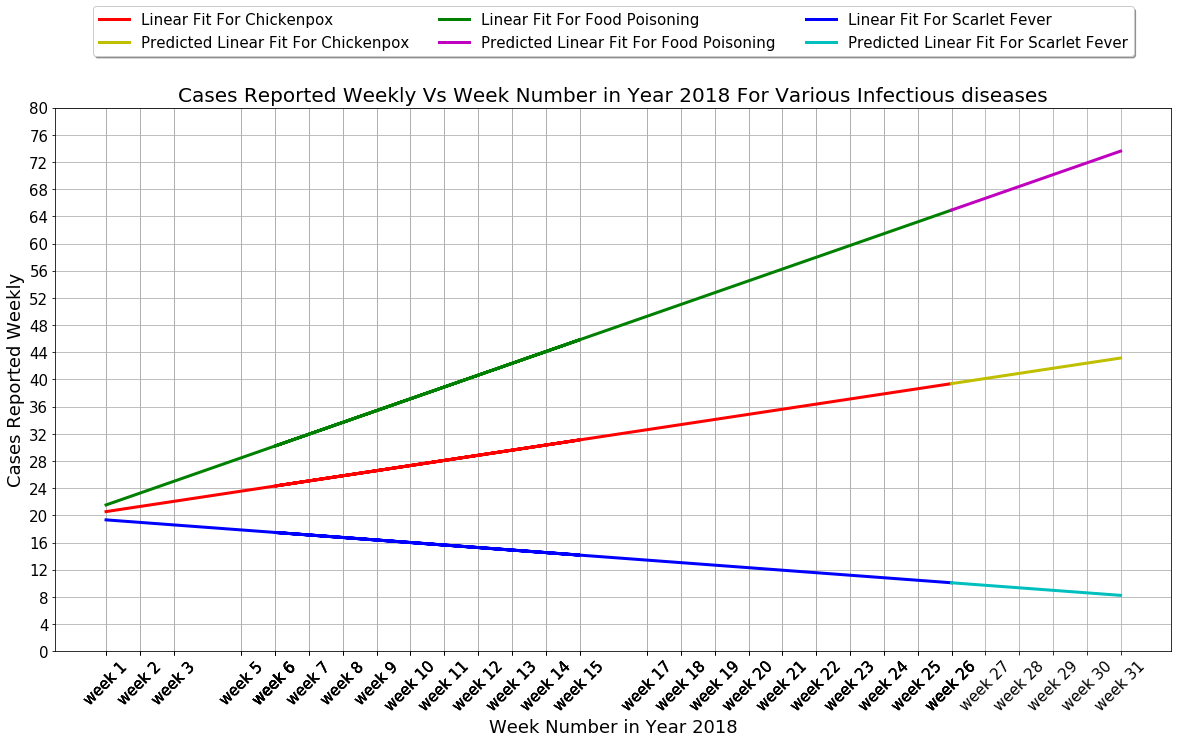

In [129]:
#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(data['Weekly Report'])


#Ploting the graph
MajorDiseaseGroupedByDisease = majorDiseaseData.groupby(['Disease'])

plt.figure(figsize = (20,10))


k=0
color = 'r-'
color2 = 'y-'
weekNumber=[]
predictedWeekNumber = []
for i in range (26,32):
    predictedWeekNumber.append(i)
for Disease,Info in MajorDiseaseGroupedByDisease:
    if(k == 1):
        color = 'g-'
        color2 = 'm-'
    elif(k == 2):
        color = 'b-'
        color2 = 'c-'
    k+=1
    weekReport=[]
    weekNumber=[]
    for each in Info['Week Number'].tolist():
        weekNumber.append(int(each[-2:]))
    for each in Info['Weekly Report'].tolist():
        weekReport.append(each)    
    newLineRegress = linregress(weekNumber,weekReport)
    newSlope = newLineRegress[0]
    newIntercept = newLineRegress[1]
    newLine = [newSlope*xi + newIntercept for xi in weekNumber]
    newPredictedLine = [newSlope*xi + newIntercept for xi in predictedWeekNumber]
    plt.plot(weekNumber, newLine, color, linewidth = 3, label = "Linear Fit For "+Disease)
    plt.plot(predictedWeekNumber, newPredictedLine, color2, linewidth = 3, label = "Predicted Linear Fit For "+Disease)

xAxis=[]
weekNumber.extend(predictedWeekNumber)
xAxisVariableNames = []
for each in weekNumber:
    xAxis.append(each)
    xAxisVariableNames.append("week "+str(each))

plt.xticks(xAxis, xAxisVariableNames,rotation = 45,fontsize = 15 )
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Cases Reported Weekly', fontsize=18)
plt.xlabel('Week Number in Year 2018', fontsize=18)
plt.title('Cases Reported Weekly Vs Week Number in Year 2018 For Various Infectious diseases', fontsize=20)
plt.legend(loc= 'upper center', ncol = 3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.2), fontsize = 15)

plt.grid()
plt.show()

From the above figure it is pretty clear that the chances of cases of Food poisoning and chicken pox is going to rise in the next 5 weeks. Whereas the cses of scarlet Fever is going to decrease.
From this Info it is pretty Clear that we must be more prepared for deseases such as food posiing and chicken pox compared to other diseases

In [132]:
m3Chart = MotionChart(df = data, key='Week Number', x='Weekly Report', y='Yearly Report', xscale='linear', yscale='linear',
                     size='Disease', color='Disease', category='Disease')
m3Chart.to_notebook()

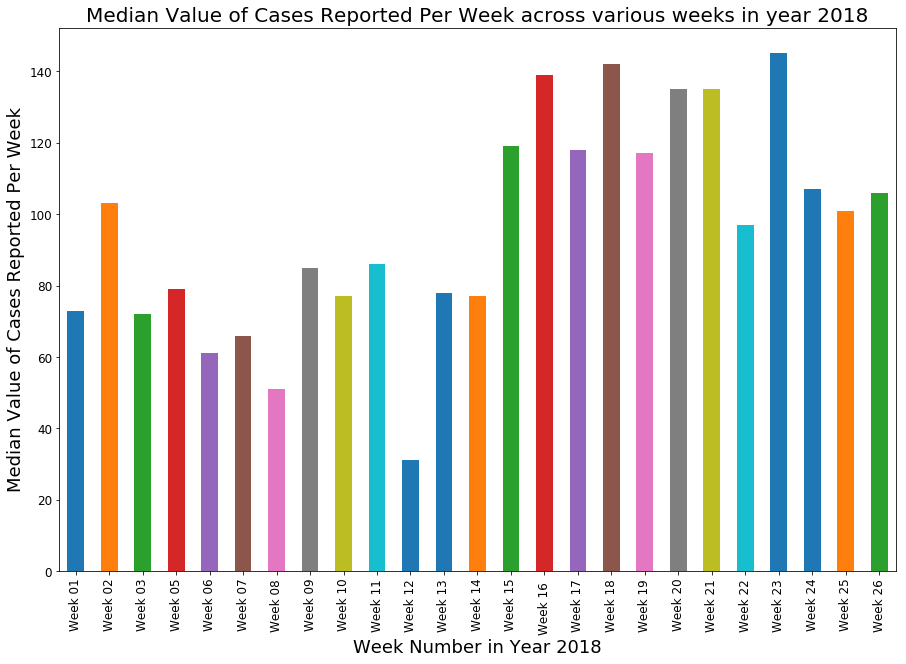

In [135]:
totalData = dataWithTotal[dataWithTotal['Disease'] == 'Total']
totalData = totalData.groupby('Week Number')['Weekly Report'].agg('median')
totalData.plot.bar(x='Week Number',y=['Yearly Report'],figsize=(15, 10),fontsize=12)
plt.ylabel('Median Value of Cases Reported Per Week',fontsize=18)
plt.xlabel('Week Number in Year 2018',fontsize=18)
plt.title('Median Value of Cases Reported Per Week across various weeks in year 2018',fontsize=20)
plt.show()